# More examples of orthogonal projection
Let $f$ be the function $f(x)=\sin(x)$.  We'd like to approximate $f$ by a polynomial of degree at most $5$.  To put this problem in the context of orthogonal projection, let $V$ be the space of continuous real valued functions and let $W=P_5(\mathbb{R})$, the space of polynomials of degree less than or equal to $5$.  We'd like to find the polynomial $p\in W$ that is ``closest'' to $f\in V$.  While there is no single natural notion of distance in the vector space $V$, if we have an  inner product
$$\langle \, ,\,\rangle:V \times V \to V$$
then we define distance between two functions $f$ and $g$ to be $$\|f-g\| \text{ where } \|v\|:=\sqrt{\langle v,v\rangle}.$$
Then, one has an orthogonal projection operator $$P:V \to W$$ that maps a vector $v\in V$ to the vector $Pv\in W$ that is closest to $v$.  There's a nice formula for $Pv$:
$$Pv = \langle v,e_1 \rangle e_1+\langle v,e_2 \rangle e_2+ \cdots +\langle v,e_n \rangle e_n$$
where $e_1, \ldots, e_n$ is any orthonormal basis for $W$.

So, this suggests the following approach to approximating a function $f$:

### Step 1: Choose an inner product
### Step 2: Choose a basis for $W$
### Step 3: Apply Gram-Schmidt to obtain an orthonormal basis $e_1, \ldots, e_n$ for W
### Step 4: Then orthogonally project $v$ to $Pv$

There's one important point to make here.  It's not essential that $$\langle \, ,\,\rangle:V \times V \to V$$ actually be positive definite on all of $V$.  As long as $\langle \, ,\,\rangle:V \times V \to V$ satisfies:

### $\langle v , v' \rangle = \langle v', v \rangle$ for all $v,v' \in V$
### $\langle u+v , v' \rangle = \langle u, v' \rangle+\langle v, v' \rangle$ for all $u,v,v' \in V$
### $\langle v , v \rangle \geq 0 $ for all $v,v' \in V$
### $\langle w , w \rangle = 0  \Leftrightarrow w = 0$ for all $w \in W$

Then $\|v\|:=\sqrt{\langle v,v\rangle}$ defines a semi-norm on $V$, the formula for $Pv$ above defines an operator $P:V \to W$ and for any $v\in V$, the vector $Pv\in W$ solves the minimization problem in the sense that 
$$\|v-Pv\| \leq \|v-w\| \text{ for all }w\in W.$$





In the examples below, we vary the formula for $\langle f,g\rangle$ and illustrate how this gives different approximations.

In [1]:
import sympy as sym

In [8]:
x = sym.Symbol("x")
y = sym.Symbol("y")
myf = x**3+sym.sin(2*x*y)
print(myf)
sym.diff(myf,y) # how to use sympy to differentiate

x**3 + sin(2*x*y)


2*x*cos(2*x*y)

You might want to use "display" instead of "print" here:

In [48]:
print(myf)
display(myf)


x**3 + sin(2*x*y)


 3             
x  + sin(2⋅x⋅y)

In [4]:
myf.diff(x,2) # higher derivatives 

2*(3*x - 2*sin(2*x))

In [5]:
def gramschmidt(listofvectors, ip): # input a list of vectors and an innerproduct
    obasis = [] # we'll start with an empty list and add the vectors in our orthonormal basis as we create them
    for v in listofvectors:
        for e in obasis: ## think inductively.  
            ## If we have e_1, e_2, ..., e_k and v=v_{k+1} we define e_{k+1} by
            ## e_{k+1}:= v - <e1,v>*e1 - <e2,v>*e2 - ... - <ek,v>*ek
            v -= ip(v, e) * e # take the old q and subtract <v,e> e for each e in the obasis
        norm = ip(v,v) 
        e = 1/sym.sqrt(norm) * v ## now normalize
        obasis.append(e)
    return(obasis)

In [9]:
def project(func,onbasis,ip):
    p = 0
    for e in onbasis:
        p += ip(func,e) * e 
    return(p)

In [10]:
def myip1(f, g):
    return sym.integrate(f*g, (x, 0, 10))

In [11]:
basis = [x**0, x, x**2, x**3, x**4, x**5]
ortho_basis1 = gramschmidt(basis,myip1)

In [49]:
display(ortho_basis1)

⎡                                                                             
⎢                       ⎛ 2          50⎞                                      
⎢                  3⋅√2⋅⎜x  - 10⋅x + ──⎟      ⎛ 3       2            ⎞  21⋅√10
⎢√10  √30⋅(x - 5)       ⎝            3 ⎠  √70⋅⎝x  - 15⋅x  + 60⋅x - 50⎠        
⎢───, ───────────, ─────────────────────, ────────────────────────────, ──────
⎣ 10       50               100                       500                     

 ⎛                  2                ⎞          ⎛                   3         
 ⎜ 4       3   900⋅x    2000⋅x   1000⎟          ⎜ 5       4   2000⋅x    2500⋅x
⋅⎜x  - 20⋅x  + ────── - ────── + ────⎟  63⋅√110⋅⎜x  - 25⋅x  + ─────── - ──────
 ⎝               7        7       7  ⎠          ⎝                9         3  
──────────────────────────────────────, ──────────────────────────────────────
             10000                                                250000      

2                  ⎞⎤
    25000⋅x   25000⎟⎥
─ + ──

In [15]:
from tabulate import tabulate
table = [[myip1(ortho_basis1[i],ortho_basis1[j]) for i in range(5)] for j in range(5)]
print(tabulate(table, tablefmt='fancy_grid'))

╒═══╤═══╤═══╤═══╤═══╕
│ 1 │ 0 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 1 │ 0 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 1 │ 0 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 1 │ 0 │
├───┼───┼───┼───┼───┤
│ 0 │ 0 │ 0 │ 0 │ 1 │
╘═══╧═══╧═══╧═══╧═══╛


In [16]:
p1 = project(sym.sin(x),ortho_basis1,myip1)

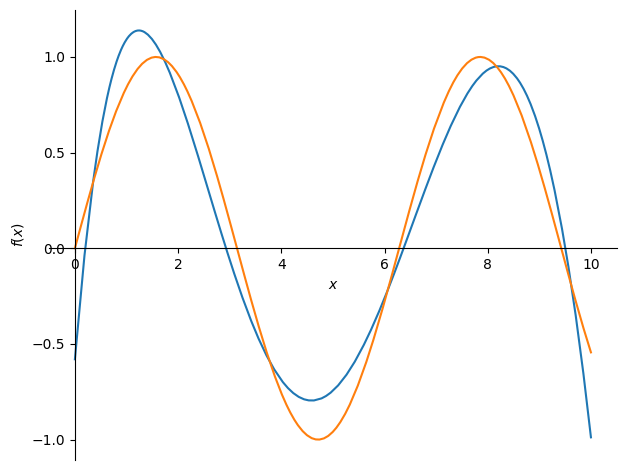

In [17]:
from sympy.plotting import plot
plot(p1,sym.sin(x),(x,0,10))

In [18]:
def myip2(f, g):
    return sum([f.subs({x:i})*g.subs({x:i}) for i in [0,2,4,6,8,10]])

In [19]:
ortho_basis2 = gramschmidt(basis,myip2)

In [20]:
ortho_basis2

⎡                                                                        ⎛    
⎢                     ⎛ 2          40⎞     ⎛ 3       2   274⋅x     ⎞     ⎜ 4  
⎢                 √21⋅⎜x  - 10⋅x + ──⎟  √5⋅⎜x  - 15⋅x  + ───── - 24⎟  √7⋅⎜x  -
⎢√6  √70⋅(x - 5)      ⎝            3 ⎠     ⎝               5       ⎠     ⎝    
⎢──, ───────────, ────────────────────, ────────────────────────────, ────────
⎣6        70              112                       144                       

              2               ⎞     ⎛                   3         2           
     3   860⋅x    1600⋅x   192⎟     ⎜ 5       4   1960⋅x    2300⋅x    56192⋅x 
 20⋅x  + ────── - ────── + ───⎟  √7⋅⎜x  - 25⋅x  + ─────── - ─────── + ─────── 
           7        7       7 ⎠     ⎝                9         3         63   
───────────────────────────────, ─────────────────────────────────────────────
          384                                            640                  

     ⎞⎤
  320⎟⎥
- ───⎟⎥
   21⎠⎥
──────⎥
      ⎦

In [21]:
p2 = project(sym.sin(x),ortho_basis2,myip2)

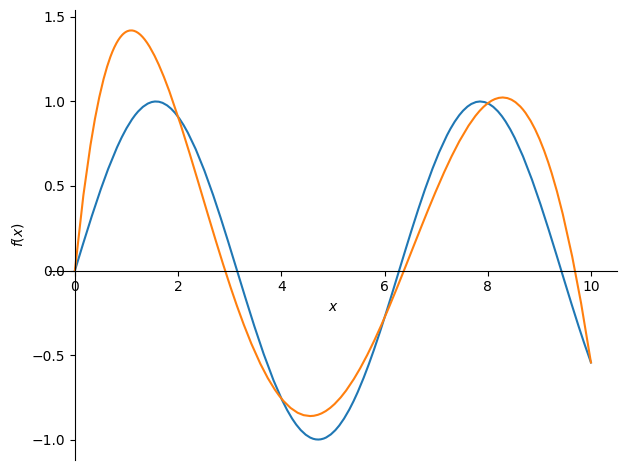

In [22]:

plot(sym.sin(x),p2,(x,0,10))

$$\langle f,g \rangle := f(1)g(1)+f'(1)g'(1)+f(5)g(5)+f'(5)g'(5)+f(9)g(9)+f'(9)g'(9)$$

When is $dist(f,g)$ small using this inner product?  $\|f-g\|$ is small $\Rightarrow$ $\langle f-g, f-g\rangle$ is small 
$$(f(1)-g(1))^2+(f'(1)-g'(1))^2+(f(5)-g(5))^2+(f'(5)-g'(5))^2+(f(9)-g(9))^2+(f'(9)-g'(9))^2 \text{ is small}$$

In [23]:
def myip3(f, g):
    df = sym.diff(f)
    dg = sym.diff(g)
    result = 0
    for i in [1,5,9]:
        result += f.subs({x:i})*g.subs({x:i}) + df.subs({x:i})*dg.subs({x:i})
    return result

In [24]:
ortho_basis3 = gramschmidt(basis,myip3)
ortho_basis3

⎡                                                                             
⎢                     ⎛ 2          43⎞        ⎛ 3       2   2017⋅x   267⎞     
⎢                 √42⋅⎜x  - 10⋅x + ──⎟  √1190⋅⎜x  - 15⋅x  + ────── - ───⎟  √14
⎢√3  √35⋅(x - 5)      ⎝            3 ⎠        ⎝               35      7 ⎠     
⎢──, ───────────, ────────────────────, ─────────────────────────────────, ───
⎣3        35              112                          1632                   

 ⎛                  2               ⎞        ⎛                    3          2
 ⎜ 4       3   890⋅x    1900⋅x   887⎟        ⎜ 5       4   33658⋅x    40790⋅x 
⋅⎜x  - 20⋅x  + ────── - ────── + ───⎟  3⋅√34⋅⎜x  - 25⋅x  + ──────── - ────────
 ⎝               7        7       7 ⎠        ⎝               153         51   
─────────────────────────────────────, ───────────────────────────────────────
               512                                                 4096       

                   ⎞⎤
   166493⋅x   22655⎟⎥
 + ───

In [25]:
p3 = project(sym.sin(x),ortho_basis3,myip3)

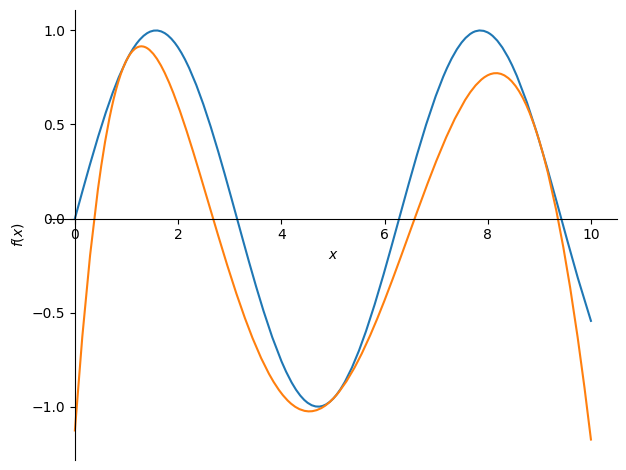

In [26]:
from sympy.plotting import plot
plot(sym.sin(x),p3,(x,0,10))

In [27]:
# Make a list of higher derivatives
[(x**3+sym.sin(x)).diff(x,n) for n in range(6)]

⎡ 3              2                                                   ⎤
⎣x  + sin(x), 3⋅x  + cos(x), 6⋅x - sin(x), 6 - cos(x), sin(x), cos(x)⎦

$$\langle f,g \rangle := f(5)g(5)+f'(5)g'(5)+f''(5)g''(5)+f'''(5)g'''(5)+f''''(5)g''''(5)+f'''''(5)g'''''(5)$$

In [28]:
def myip4(f, g):
    result = 0
    for i in range(6):
        dif=f.diff(x,i)
        dig=g.diff(x,i)
        result += dif.subs({x:5})*dig.subs({x:5})
    return result

[1, x - 5, x**2/2 - 5*x + 25/2, x**3/6 - 5*x**2/2 + 25*x/2 - 125/6, x**4/24 - 5*x**3/6 + 25*x**2/4 - 125*x/6 + 625/24, x**5/120 - 5*x**4/24 + 25*x**3/12 - 125*x**2/12 + 625*x/24 - 625/24]


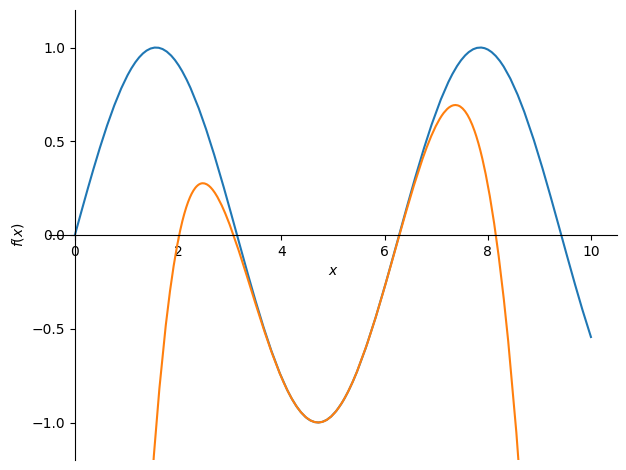

In [29]:
ortho_basis4 = gramschmidt(basis,myip4)
print(ortho_basis4)
p4 = project(sym.sin(x),ortho_basis4,myip4)
plot(sym.sin(x),p4,(x,0,10),ylim=[-1.2,1.2])

In [37]:
print(p4.evalf())
p4.evalf().diff(x,2).subs({x:5})

0.00236385154552689*x**5 - 0.0990514667491362*x**4 + 1.34278941769047*x**3 - 7.75947354756359*x**2 + 19.3078886291108*x - 16.8400753039969


0.958924274663151

In [36]:
sym.sin(x).diff(x,2).subs({x:5}).evalf()

0.958924274663138

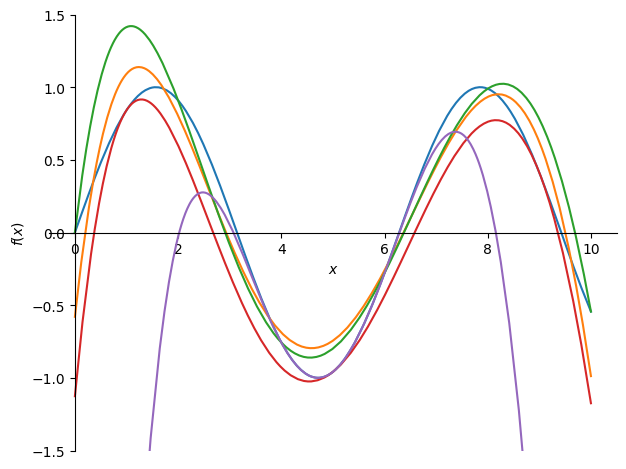

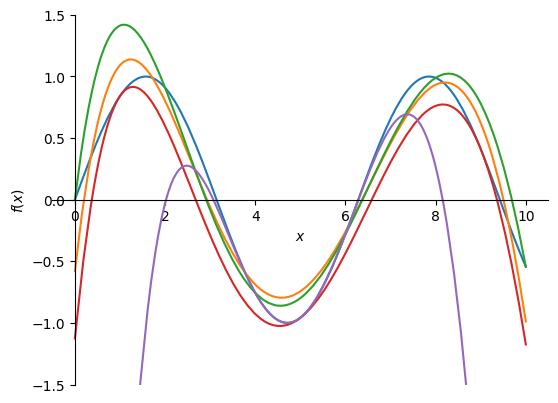

In [50]:
myplot = plot(sym.sin(x),p1, p2, p3, p4,(x,0,10),ylim=[-1.5,1.5])
myplot.save("myplot.pdf") # save a hires copy

In [60]:
# the formulas for the five polynomials approximated to 5 significant digits
for p in [p1,p2,p3,p4]: display(p.evalf(5)) 


            5             4            3           2                     
0.00083988⋅x  - 0.032295⋅x  + 0.40347⋅x  - 1.9769⋅x  + 3.2765⋅x - 0.58015

            5             4            3           2                       
0.00099728⋅x  - 0.035755⋅x  + 0.42765⋅x  - 2.0063⋅x  + 3.0268⋅x + 1.1176e-6

           5             4            3           2                    
0.0010604⋅x  - 0.038374⋅x  + 0.46432⋅x  - 2.2454⋅x  + 3.7863⋅x - 1.1265

           5             4           3           2                   
0.0023639⋅x  - 0.099051⋅x  + 1.3428⋅x  - 7.7595⋅x  + 19.308⋅x - 16.84